## CISC 351 - Group Assignment Analysis RQ2 (Student#: 20281662)

NOTES: 
- In order for all the code to execute properly, ensure all used libraries are installed, and use run all to make sure that code blocks are ran sequencially (as some blocks depend on code from previous blocks). Total runtime should be less then 3 mins.
- Use the 'New_York_Full_Data.xlsx' attached file as the data source.

    Execute below code to import required libraries and load the dataset

In [17]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import scipy.stats as sp
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Q1

#### i\)
    Execute below code to display home sale price by borough

In [18]:
file_names = {"London": 'London-listings.csv',
              "Paris": 'Paris-listings.csv',
              "NewYork": 'NewYork-listings.csv'
             }

columns_to_keep = ['id', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                   'review_scores_value', 'reviews_per_month', 'price']

df = []
for city, file_name in file_names.items():
    # Load data and only keep relevant columns
    df_temp = pd.read_csv(file_name, low_memory=False)[columns_to_keep]

    # Drop rows with NA/NULL values
    df_temp = df_temp.dropna().reset_index(drop=True)

    # Drop duplicate rows
    df_temp = df_temp.drop_duplicates(ignore_index=True)

    df.append(df_temp)
    del(df_temp)

df = pd.concat(df, ignore_index=True)

# Drop duplicate rows
df = df.drop_duplicates(ignore_index=True)

display(df)

# Convert columns to numeric, coerce errors to keep non-convertible values as NaN
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

df = df[(df['price'] < 500) & (df['price'] >= 10)].copy()

df.fillna(df.mean(), inplace=True)
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Define the bin edges
bins = [i * 0.5 for i in range(0, 11)]  # Generates [0, 0.5, 1.0, ..., 5.0]
labels = [f'{0.5*i}-{0.5*(i+1)}' for i in range(10)]  # Generates ['0-0.5', '0.5-1', ..., '4.5-5']

# Use pd.cut to bin the values
df['rating_bucket'] = pd.cut(df['review_scores_rating'], bins=bins, labels=labels, right=False)

# Convert rating_bucket to a categorical type with a specified order based on the labels
rating_labels = [f'{0.5*i}-{0.5*(i+1)}' for i in range(10)]  # Adjust the range if necessary
df['rating_bucket'] = pd.Categorical(df['rating_bucket'], categories=rating_labels, ordered=True)

# Plot the graph
fig = px.box(df, x='rating_bucket', y='price', category_orders={"rating_bucket": rating_labels})
fig.show()

id  number_of_reviews  number_of_reviews_ltm  \
0                   198258                 41                      1   
1                    33332                 20                      0   
2                    42010                556                     29   
3                   284603                  6                      0   
4                    89870                133                     15   
...                    ...                ...                    ...   
136099  847626209769232363                  2                      2   
136100  827584086612689502                  1                      1   
136101            34646398                  1                      0   
136102             4352537                 58                      2   
136103            51861574                  5                      0   

        number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                            0                  4.74                    4.83   
1                            0                  4.40                    4.47   
2                            3                  4.88                    4.89   
3                            0                  4.83                    4.83   
4                            1                  4.65                    4.68   
...                        ...                   ...                     ...   
136099                       0                  5.00                    5.00   
136100                       0                  5.00                    5.00   
136101                       0                  5.00                    5.00   
136102                       0                  4.69                    4.72   
136103                       0                  3.80                    4.20   

        review_scores_cleanliness  review_scores_checkin  \
0                            4.25                   4.80   
1                            4.58                   4.58   
2                            4.83                   4.96   
3                            5.00                   5.00   
4                            4.64                   4.90   
...                           ...                    ...   
136099                       5.00                   5.00   
136100                       5.00                   5.00   
136101                       5.00                   5.00   
136102                       4.33                   4.78   
136103                       3.80                   4.40   

        review_scores_communication  review_scores_location  \
0                              4.88                    4.45   
1                              4.53                    4.68   
2                              4.95                    4.73   
3                              5.00                    5.00   
4                              4.91                    4.73   
...                             ...                     ...   
136099                         5.00                    5.00   
136100                         5.00                    5.00   
136101                         5.00                    5.00   
136102                         4.76                    4.83   
136103                         3.80                    4.20   

        review_scores_value  reviews_per_month    price  
0                      4.68               0.27   $67.00  
1                      4.26               0.12  $140.00  
2                      4.87               3.45   $65.00  
3                      4.83               0.04  $297.00  
4                      4.50               0.89  $149.00  
...                     ...                ...      ...  
136099                 5.00               0.61   $37.00  
136100                 5.00               0.09  $165.00  
136101                 5.00               0.07  $103.00  
136102                 4.62               0.51  $230.00  
136103                 3.80               0.21  $175.00  

[136104 rows x 13 colum

#### iii\) 
    Execute below code to check for missing values

In [19]:
# Count the total number of missing values
df.isnull().values.sum()
# Column-wise summary of missing values
df.isna().sum()
# Visualize using msno package
msno.bar(df)

<AxesSubplot:>

    Execute below code to setup prediction dataframe and check attribute correlation with 'price'

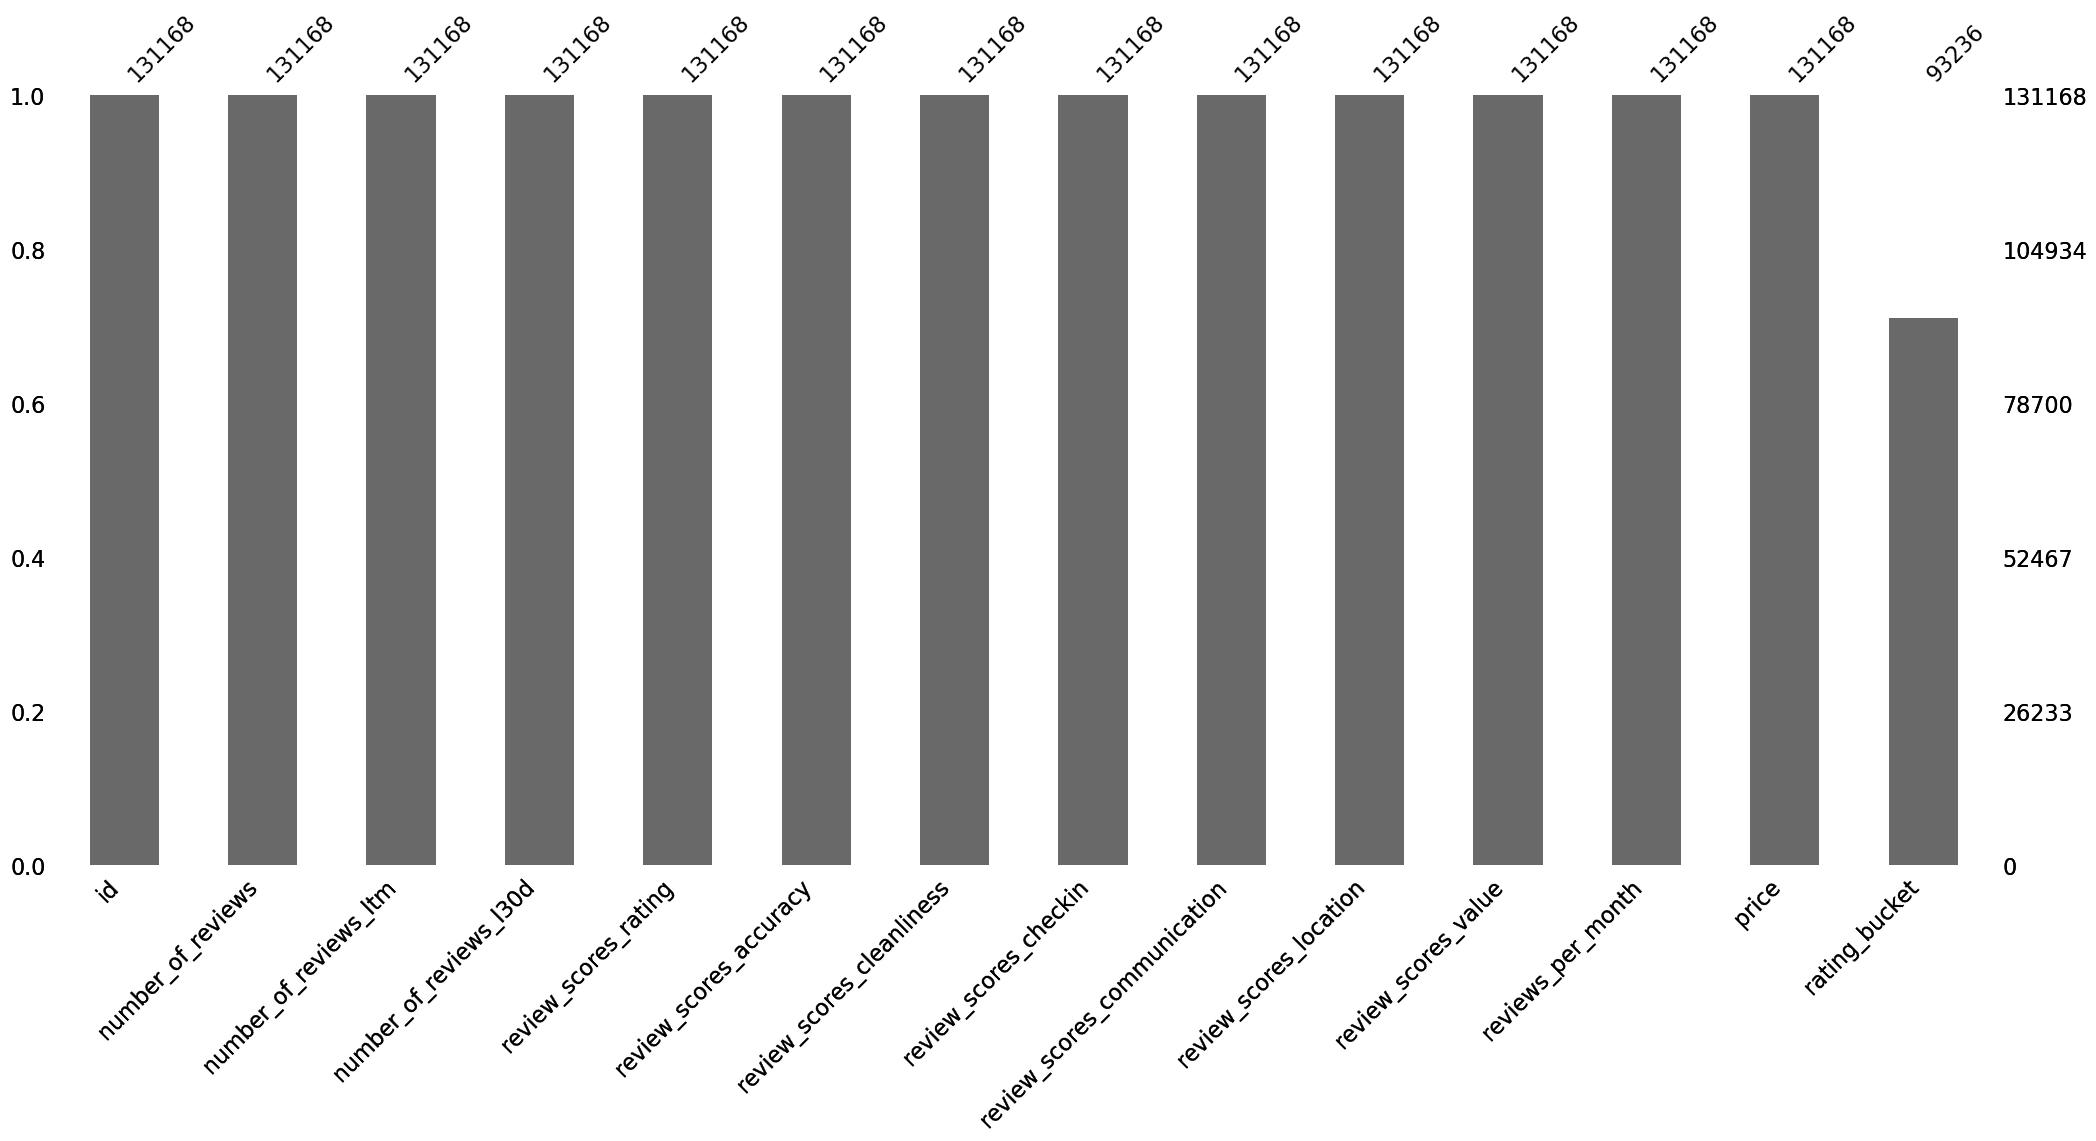

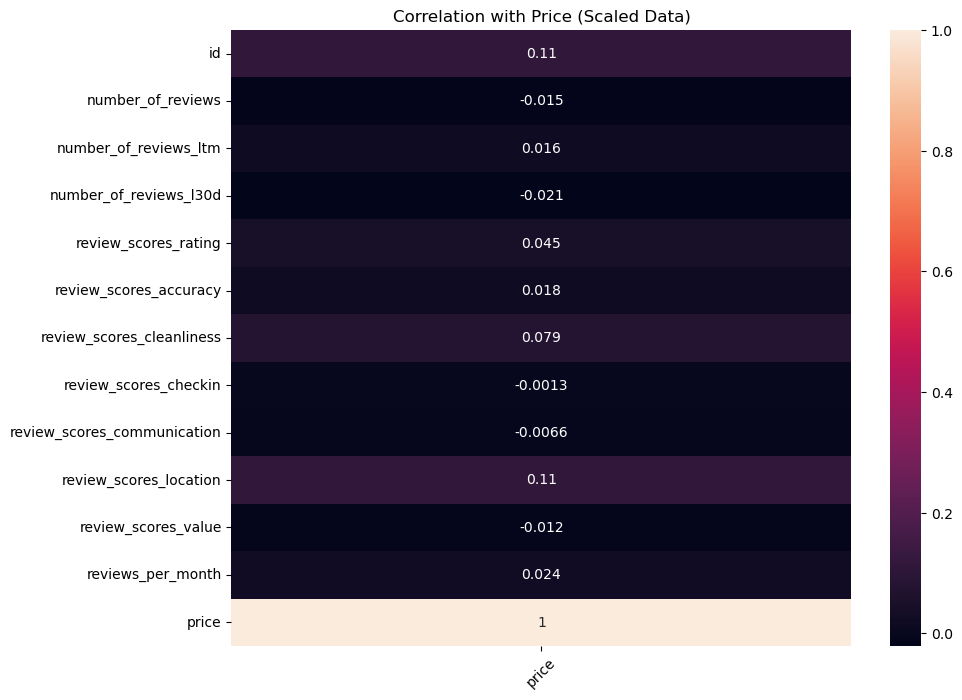

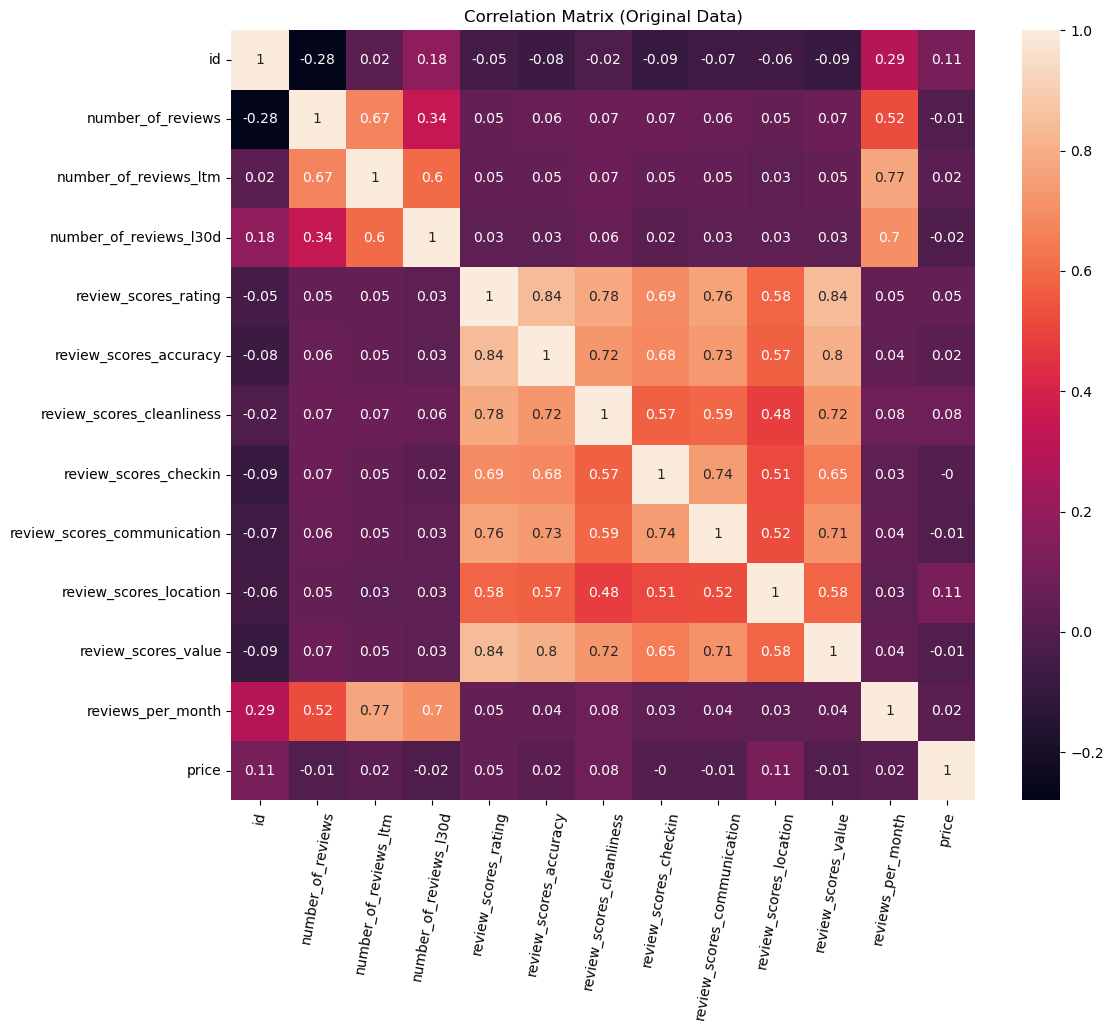

In [21]:
df = df.drop(columns='rating_bucket')

# Scale all data except 'price'
target = df['price']
features = df.drop('price', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled = pd.concat([scaled_features_df, target.reset_index(drop=True)], axis=1)


# Create the first heatmap for scaled data
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
corr = df_scaled.corr()[['price']]
sns.heatmap(corr, annot=True)
plt.title("Correlation with Price (Scaled Data)")
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.yticks(rotation=0)   # Adjust rotation as needed
plt.show()

# Create the second heatmap for original data
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
cor_df = df_scaled.corr(method="pearson").round(2)
sns.heatmap(cor_df, annot=True)
plt.title("Correlation Matrix (Original Data)")
plt.xticks(rotation=80)  # Rotate the x labels for better readability
plt.yticks(rotation=0)   # Adjust rotation as needed
plt.show()

Analysing the heatmap, we note that the highest correlated attribute to the sale price is the tax class and building class. Otherwise, there is also considerable correlation with the lot, unit type, and square footage. There seems to be a considerable reverse correlation with the borough, and seen as boroughs are classified between 1-5 from the most influencial to least, the boroughs have an effect on price.

When looking at the correlation matrix, we see that there is high correlation between lot/building class and tax class. Obviously all location based attribites are somewhat correlated. On the other hand, there seems to be a reverse correlation with tax class and the location/age of a property. Interestingly, there seems to be strong reverse correlation between apartment number and tax/building class.

This clarrified some conceptions on the data and emphazied the importance of some attributes such as tax class.

    Execute below code to check for multicollinearity

In [22]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns

# Here, all_data_prediction_scaled.values will ensure all the DataFrame values are used for VIF calculation
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(len(df_scaled.columns))]

# Display the VIF for each feature
print(vif_data)

                        Feature       VIF
0                            id  1.544423
1             number_of_reviews  2.246881
2         number_of_reviews_ltm  3.340105
3        number_of_reviews_l30d  2.052071
4          review_scores_rating  5.981513
5        review_scores_accuracy  4.223838
6     review_scores_cleanliness  2.696009
7         review_scores_checkin  2.553294
8   review_scores_communication  3.117825
9        review_scores_location  1.636692
10          review_scores_value  4.155721
11            reviews_per_month  3.980656
12                        price  1.016290


From these results on multicollinearity, we note that there is high multillinearity between:
- Residential/Commercial/Total units
- Building Class at Present/Time of Sale

Thus, I will only include the Residential units (since we want to evaluate the residential class only) and Building class at time of sale out of these options.

Finally, with this analysis, as well as feature engineering, here are the attributes that we will use for prediction:
- Borough
- Neighborhood
- Building Class Category
- Tax Class at Present
- Block
- Lot
- Apartment Number
- Zip Code
- Residential Units
- Land Square Feet
- Gross Square Feet
- Year Built
- Tax Class at Time of Sale
- Building Class at Time of Sale
- Sale Price *(target attribute for prediction)*
- Sale Year
- Sale Month

## Q6

    Execute below code to run regression models

In [ ]:
all_data_raw = df.copy()
all_data_raw = all_data_raw.drop(columns=["EASE-MENT", "APARTMENT NUMBER"])
all_data_raw = all_data_raw.dropna()
df_scaled.loc[:, 'SALE PRICE LOG'] = np.log(1 + df_scaled['SALE PRICE'])
all_data_raw.loc[:, 'SALE PRICE LOG'] = np.log(1 + all_data_raw['SALE PRICE'])

# Convert columns to numeric, coerce errors to keep non-convertible values as NaN
for column in all_data_raw.columns:
    all_data_raw[column] = pd.to_numeric(all_data_raw[column], errors='coerce').fillna(0)

# Split the data into train and test set for A (engineered dataset)
trainA, testA = train_test_split(df_scaled, test_size=0.2, shuffle=True, random_state=123)
y_train_A = trainA['SALE PRICE']
y_test_A = testA['SALE PRICE']
y_train_log_A = trainA['SALE PRICE LOG']
y_test_log_A = testA['SALE PRICE LOG']
X_train_A = trainA.drop(['SALE PRICE','SALE PRICE LOG'], axis=1)
X_test_A = testA.drop(['SALE PRICE','SALE PRICE LOG'], axis=1)

# Split the data into train and test set for b (raw dataset)
trainB, testB = train_test_split(all_data_raw, test_size=0.2, shuffle=True, random_state=123)
y_train_B = trainB['SALE PRICE']
y_test_B = testB['SALE PRICE']
y_train_log_B = trainB['SALE PRICE LOG']
y_test_log_B = testB['SALE PRICE LOG']
X_train_B = trainB.drop(['SALE PRICE','SALE PRICE LOG'], axis=1)
X_test_B = testB.drop(['SALE PRICE','SALE PRICE LOG'], axis=1)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def train_test(model, xt, yt, xtt, ytt, ytlog, yttlog):
    print(model)
    model.fit(xt, yt)
    print("RMSE train: {}".format(rmse(yt, model.predict(xt))))
    print("RMSE test : {}".format(rmse(ytt, model.predict(xtt))))
    model.fit(xt, ytlog)
    print("RMSE train log-scale: {}".format(rmse(ytlog, model.predict(xt))))
    print("RMSE test log-scale: {}".format(rmse(yttlog, model.predict(xtt))))

# A multiple linear regression model
model_base = LinearRegression()

# With Ridge and Lasso
lambda_list_ridge = list(np.linspace(20, 25, 101))
model_ridge = Ridge(alpha=lambda_list_ridge[0])

lambda_list_lasso = list(np.linspace(0.0006, 0.0007, 11))
model_lasso = Lasso(alpha=lambda_list_lasso[0], max_iter=100000)

print("RESULTS FOR MODEL A")
print("______________________")
for model in [model_base, model_ridge]:
    train_test(model, X_train_A, y_train_A, X_test_A, y_test_A, y_train_log_A, y_test_log_A)

print("\n\n\nRESULTS FOR MODEL B")
print("______________________")
for model in [model_base, model_ridge]:
    train_test(model, X_train_B, y_train_B, X_test_B, y_test_B, y_train_log_B, y_test_log_B)

RESULTS FOR MODEL A
______________________
LinearRegression()
RMSE train: 1121389.1545086636
RMSE test : 1121326.9748844982
RMSE train log-scale: 0.5861454562865304
RMSE test log-scale: 0.5872176674991127
Ridge(alpha=20.0)
RMSE train: 1122215.6090213584
RMSE test : 1123227.6409751032
RMSE train log-scale: 0.5886557618125839
RMSE test log-scale: 0.5906435482349781



RESULTS FOR MODEL B
______________________
LinearRegression()
RMSE train: 9987280.057909634
RMSE test : 8581832.018700697
RMSE train log-scale: 6.7189838731867875
RMSE test log-scale: 6.722805557345492
Ridge(alpha=20.0)
RMSE train: 9987280.062349165
RMSE test : 8581831.864093557
RMSE train log-scale: 6.7189838746829
RMSE test log-scale: 6.722806423850953


Let's compare the two models – Linear Regression and Ridge Regression – for both Model A and Model B based on their Root Mean Squared Error (RMSE) values:

### Model A Comparison:
1. **Linear Regression**:
   - RMSE Train: 1,121,389.15
   - RMSE Test: 1,121,326.97
   - RMSE Train (Log-Scale): 0.586
   - RMSE Test (Log-Scale): 0.587

2. **Ridge Regression (alpha=20.0)**:
   - RMSE Train: 1,122,215.61
   - RMSE Test: 1,123,227.64
   - RMSE Train (Log-Scale): 0.589
   - RMSE Test (Log-Scale): 0.591

### Model B Comparison:
1. **Linear Regression**:
   - RMSE Train: 9,987,280.06
   - RMSE Test: 8,581,832.02
   - RMSE Train (Log-Scale): 6.719
   - RMSE Test (Log-Scale): 6.723

2. **Ridge Regression (alpha=20.0)**:
   - RMSE Train: 9,987,280.06
   - RMSE Test: 8,581,831.86
   - RMSE Train (Log-Scale): 6.719
   - RMSE Test (Log-Scale): 6.723

### Analysis:
- **Model A** has significantly lower RMSE values compared to **Model B** for both Linear and Ridge Regression. This suggests that the feature engineering and data preprocessing done in Model A are actually effective in capturing the underlying patterns in the data.

- For **Model A**, Linear Regression has a slightly lower RMSE than Ridge Regression, both on the original scale and the log scale, indicating that Linear Regression might be a better fit for this particular dataset.

- For **Model B**, the RMSE values are considerably higher for both models, suggesting that the raw data might not be as well-suited for linear modeling, or it requires more nuanced feature engineering.

- The RMSE values on the log scale are much lower for Model A, which indicates that the target variable's log transformation helps in reducing the scale and possibly normalizing the distribution of errors.

- The difference in RMSE between the train and test sets for both models in Model A is minimal, indicating good generalization. However, the overall RMSE values are high, suggesting room for improvement in model performance.

- The RMSE values for Model B, both on the original and log scales, are extremely high, which might indicate issues with the scale of the target variable, potential outliers, or that a linear model is not suitable for this dataset.

    (Optional) Execute below code to visualize difference between dataset and model performance

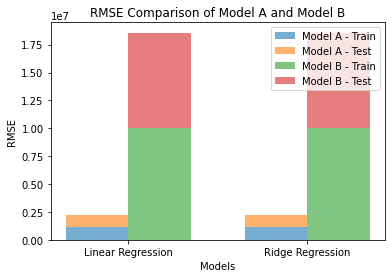

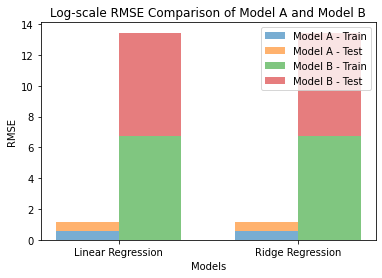

In [ ]:
# RMSE results
results = {
    'Model A': {
        'Linear Regression': {'Train': 1121389.15, 'Test': 1121326.97},
        'Ridge Regression': {'Train': 1122215.61, 'Test': 1123227.64}
    },
    'Model B': {
        'Linear Regression': {'Train': 9987280.06, 'Test': 8581832.02},
        'Ridge Regression': {'Train': 9987280.06, 'Test': 8581831.86}
    }
}

# Log-scale RMSE results
log_results = {
    'Model A': {
        'Linear Regression': {'Train': 0.586, 'Test': 0.587},
        'Ridge Regression': {'Train': 0.589, 'Test': 0.591}
    },
    'Model B': {
        'Linear Regression': {'Train': 6.719, 'Test': 6.723},
        'Ridge Regression': {'Train': 6.719, 'Test': 6.723}
    }
}


def plot_rmse_results(results, title):
    labels = list(results['Model A'].keys())
    model_a_train = [results['Model A'][label]['Train'] for label in labels]
    model_a_test = [results['Model A'][label]['Test'] for label in labels]
    model_b_train = [results['Model B'][label]['Train'] for label in labels]
    model_b_test = [results['Model B'][label]['Test'] for label in labels]

    x = range(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x, model_a_train, width, label='Model A - Train', alpha=0.6)
    ax.bar(x, model_a_test, width, bottom=model_a_train, label='Model A - Test', alpha=0.6)
    ax.bar([p + width for p in x], model_b_train, width, label='Model B - Train', alpha=0.6)
    ax.bar([p + width for p in x], model_b_test, width, bottom=model_b_train, label='Model B - Test', alpha=0.6)

    ax.set_xlabel('Models')
    ax.set_ylabel('RMSE')
    ax.set_title(title)
    ax.set_xticks([p + width/2 for p in x])
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot RMSE results
plot_rmse_results(results, "RMSE Comparison of Model A and Model B")

# Plot Log-scale RMSE results
plot_rmse_results(log_results, "Log-scale RMSE Comparison of Model A and Model B")